In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
 df = pd.read_csv('/home/sanat/Downloads/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df = df.fillna(0)

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df = pd.get_dummies(data=df, columns=['Fence','MasVnrType','MSZoning','LotShape','LotConfig'])

<Figure size 720x576 with 0 Axes>

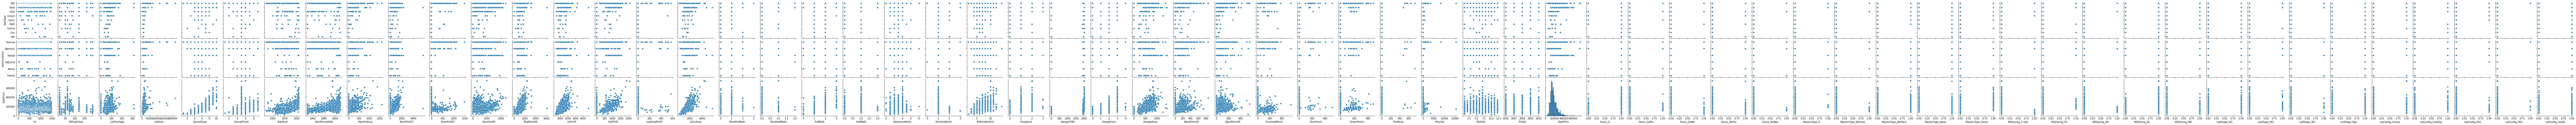

In [7]:
#visiualizing the data 
plt.figure(figsize=(10,8))
sns.pairplot(df,y_vars=["SaleType", "SaleCondition","SalePrice"])

In [8]:
data = df[['1stFlrSF','SalePrice']]
data.head()

,1stFlrSF,SalePrice
0,856,208500
1,1262,181500
2,920,223500
3,961,140000
4,1145,250000


<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

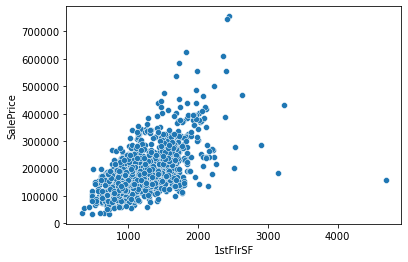

In [9]:
sns.scatterplot(data=data , x='1stFlrSF',y='SalePrice')

In [10]:
# Scaling between 0 and 1 using min max scaler
scaler = MinMaxScaler()
data[['1stFlrSF','SalePrice']]=scaler.fit_transform(data[['1stFlrSF','SalePrice']])
data
                                                          

,1stFlrSF,SalePrice
0,0.119780,0.241078
1,0.212942,0.203583
2,0.134465,0.261908
3,0.143873,0.145952
4,0.186095,0.298709
...,...,...
1455,0.142038,0.194556
1456,0.399036,0.243161
1457,0.195961,0.321622
1458,0.170721,0.148903


<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

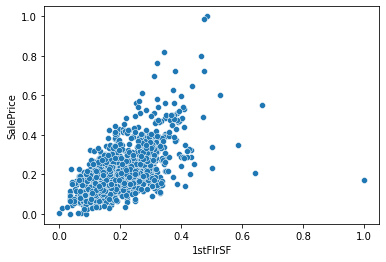

In [11]:
sns.scatterplot(data = data , x = '1stFlrSF', y = 'SalePrice')

In [12]:
# Read the data
X = data['1stFlrSF'].values.reshape(-1,1)
y = data['SalePrice']

In [13]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [14]:
y_pred = reg.predict(X)

In [15]:
r2_score(y, y_pred)

0.36705686969596574

In [16]:
print(reg.intercept_)
print(reg.coef_)

0.05951486545871565
[0.75346995]


In [17]:
rss = np.sum(np.square(y - y_pred))
print(rss)
mse = mean_squared_error(y,y_pred)
print(mse)
#Root Mean Squared Error
rmse = mse**0.5
print(rmse)

11.239324167856138
0.007698167238257629
0.08773920012319253


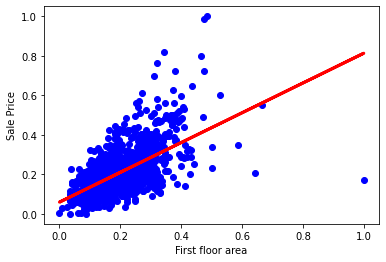

In [18]:
plt.scatter(X,y,color = 'blue')
plt.plot(X,y_pred,color = 'red' ,linewidth =3)
plt.xlabel("First floor area")
plt.ylabel("Sale Price")
plt.show()

In [19]:
#Ridge Regression
degree =2
ridgecoef = PolynomialFeatures(degree)
X_poly = ridgecoef.fit_transform(X)
ridgereg = Ridge(alpha = 0.001)
ridgereg.fit(X_poly, y)
print(ridgereg.coef_)
y_pred = ridgereg.predict(ridgecoef.fit_transform(X))
print("r2 score = " +str(r2_score(y,y_pred)))

#Lasso Regression
lassocoef = PolynomialFeatures(degree)
X_poly = lassocoef.fit_transform(X)
lassoreg = Lasso(alpha = 0.001)
lassoreg.fit(X_poly, y)
print(lassoreg.coef_)
y_pred = lassoreg.predict(lassocoef.fit_transform(X))
print("r2 score =" + str(r2_score(y, y_pred)))

[ 0.          1.00529168 -0.50157162]
r2 score = 0.3745713062073147
[0.         0.62630253 0.        ]
r2 score =0.35660116725643753
